In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: February 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Gradient descent for univariate functions

In [3]:
def numerical_gradient(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

In [4]:
def gradient_descent(f, starting_point, learning_rate, max_iter=100, tol=1e-6):
    x = starting_point
    x_history = [x]
    
    for i in range(max_iter):
        grad = numerical_gradient(f, x)        
        new_x = x - learning_rate * grad
        if np.abs(new_x - x) < tol:
            break
        x = new_x
        x_history.append(x)
        
    return x, np.array(x_history)

In [5]:
# Run gradient descent on the example function
def f(x):
    return x**2 + 10 * np.sin(x)

starting_point = 10
learning_rate = 0.1

minimum, x_history = gradient_descent(f, starting_point, learning_rate)
print(f'Minimum: {minimum:.3f}')
print('Number of iterations:', len(x_history))

Minimum: 3.837
Number of iterations: 12


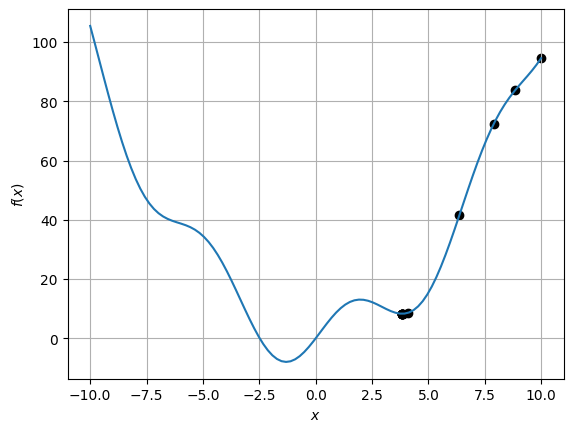

In [6]:
# Plot the function with the gradient descent path
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

plt.scatter(x_history, f(x_history), c='k')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()

Gradient descent for multivariate functions

In [7]:
from scipy.optimize import approx_fprime

def gradient_descent(f, starting_point, learning_rate, max_iter=100, tol=1e-6, eps=1e-5):
    x = starting_point
    x_history = [x]
    
    for i in range(max_iter):
        grad = approx_fprime(x, f, eps)       
        new_x = x - learning_rate * grad
        if np.linalg.norm(new_x - x) < tol:
            break
        x = new_x
        x_history.append(x)
        
    return x, np.array(x_history)

In [8]:
def f(point):
    x, y = point
    return x**2 + y**2 + 10 * np.sin(x * y)

starting_point = [10, -5]
learning_rate = 0.01
max_iter = 500

minimum, x_history = gradient_descent(f, starting_point, learning_rate, max_iter)
print(f'Minimum:', minimum)
print('Number of iterations:', len(x_history))

Minimum: [ 2.76625842 -2.76641678]
Number of iterations: 311


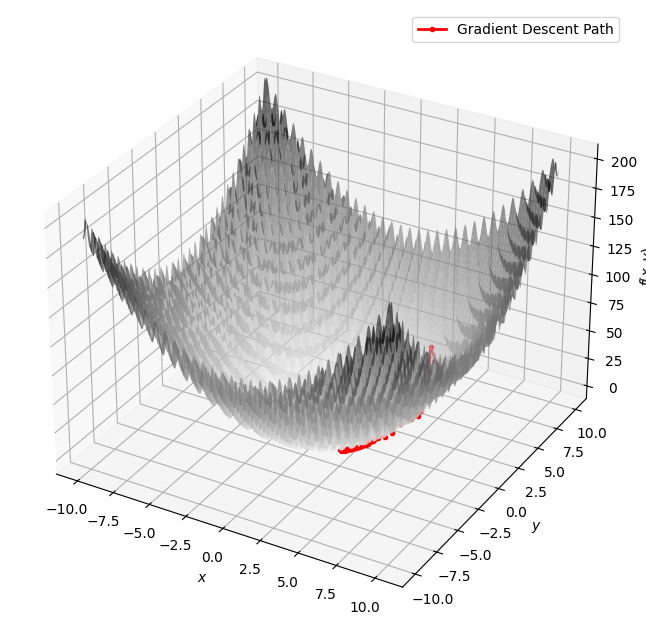

In [9]:
# Plot the function with the gradient descent path

# Create a meshgrid for the x and y values
x_values = np.linspace(-10, 10, 500)
y_values = np.linspace(-10, 10, 500)
x_mesh, y_mesh = np.meshgrid(x_values, y_values)

# Calculate the z values
z_mesh = f([x_mesh, y_mesh])

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='binary', alpha=0.6)

# Extract the path taken by gradient descent
x_path, y_path = np.array(x_history).T
z_path = f([x_path, y_path])

# Overlay the gradient descent path
ax.plot(x_path, y_path, z_path, color='r', marker='o', 
        markersize=3, linestyle='-', linewidth=2, label='Gradient Descent Path')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$')
ax.legend();